<a href="https://colab.research.google.com/github/Komal-Zia/cvassignment/blob/main/CVassignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Libraries for data preprocessing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')


np.random.seed(2)

In [11]:
#Libraries for data splitting and confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import itertools

In [13]:
# Import necessary libraries for deep learning
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D  # Note: MaxPool2D renamed to MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [14]:
#Loading the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [15]:
#Viewing the dataset
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#Defining the features and output for training data
X_train = train.drop(labels = ["label"],axis = 1)
y_train = train["label"]

In [17]:
#Checking for null values
#Training data
train.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,1
pixel780,1
pixel781,1
pixel782,1


In [18]:
#Test data
test.isnull().sum()

,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel779,1
pixel780,1
pixel781,1
pixel782,1


In [19]:
#Normalization
X_train = X_train / 255.0
test = test / 255.0

In [20]:
#Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [21]:
#Label Encoding
#Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
y_train = to_categorical(y_train, num_classes = 10)

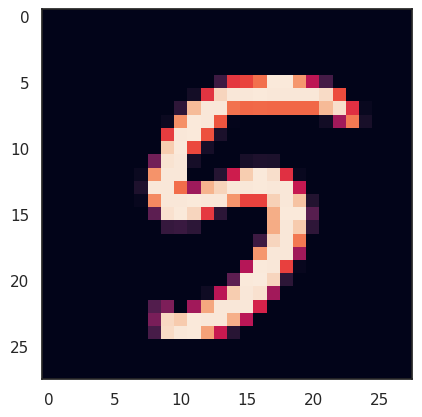

In [22]:
#Visualizing an example for better understanding the images in our dataset
g = plt.imshow(X_train[8][:,:,0])

In [25]:
#Setting the CNN model
#CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [27]:
#Setting the Optimizer
# Use 'learning_rate' instead of 'lr' for the RMSprop optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [28]:
#Compiling the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [29]:
#Setting the Annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [30]:
epochs = 1
batch_size = 86

In [32]:
# Import necessary library for data splitting
from sklearn.model_selection import train_test_split

# ... (your existing code) ...

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)  # Adjust test_size as needed

# ... (rest of your code, including model.fit) ...

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step


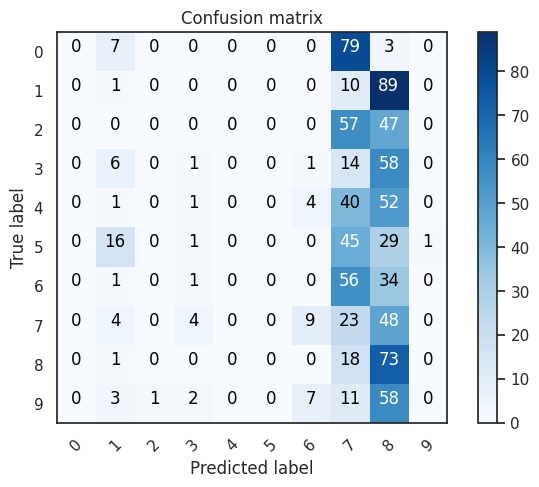

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Initialize thresh outside the if block to ensure it's always defined
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Predicting the values from the validation dataset
y_pred = model.predict(X_val)
#Converting predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)
#Converting validation observations to one hot vectors
y_true = np.argmax(y_val,axis = 1)
#Computing the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
#Plotting the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

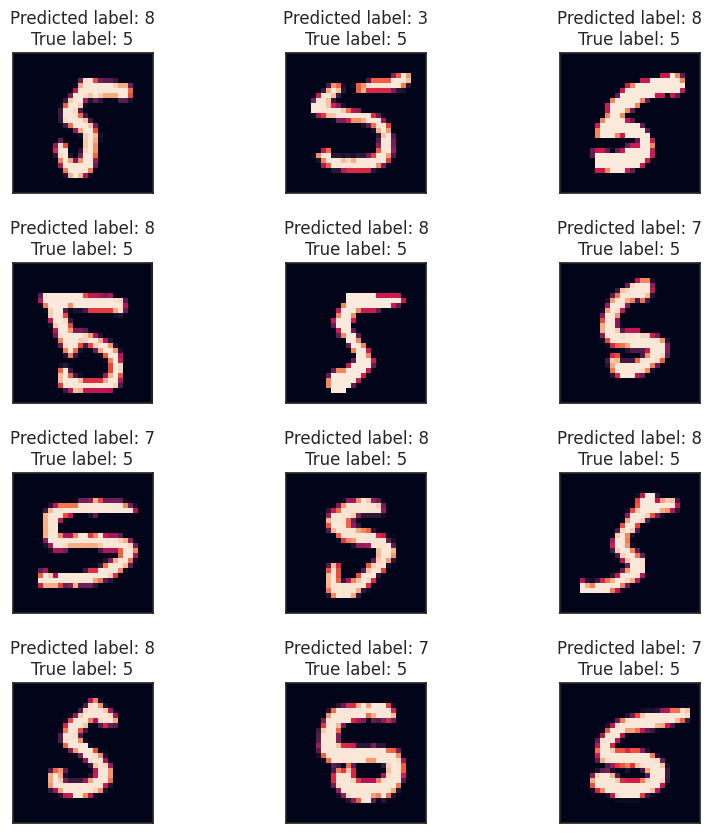

In [36]:
#To display some error results

errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
X_val_errors = X_val[errors]

#Defining a function for plotting the erros results
def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    """ This function shows 12 images with their predicted and real labels"""
    nrows = 4
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5)
    for i, axi in enumerate(ax.flat):
        if i < len(errors_index):
            error = errors_index[i]
            axi.imshow((img_errors[error]).reshape((28,28)))
            axi.set_title("Predicted label: {}\nTrue label: {}".format(pred_errors[error], obs_errors[error]))
        axi.set_xticks([])
        axi.set_yticks([])

# Probabilities of the wrong predicted numbers
y_pred_errors_prob = np.max(y_pred_errors, axis=1)
# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_delta_errors = np.argsort(delta_pred_true_errors)

# Top 12 errors
most_important_errors = sorted_delta_errors[-12:]

# Displaying the top 12 errors
display_errors(most_important_errors, X_val_errors, y_pred_classes_errors, y_true_errors)

In [37]:
# predicting the results
results = model.predict(test)

# selecting the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")
results

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step


,Label
0,7
1,7
2,8
3,7
4,8
...,...
2289,8
2290,7
2291,8
2292,7


In [40]:
# Compile the model
from tensorflow.keras.optimizers import Adam # Import the Adam optimizer

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32) # Use the correct variable names for training data

# Evaluate the model
# Assuming you have x_test and y_test defined somewhere
# If not, you'll need to define and prepare them similarly to X_train, y_train, X_val, y_val
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)  # Evaluate on validation data if x_test, y_test are not available

# Print accuracy
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 30s 240ms/step - accuracy: 0.5235 - loss: 1.3598 - val_accuracy: 0.9422 - val_loss: 0.1893
Epoch 2/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 239ms/step - accuracy: 0.9220 - loss: 0.2485 - val_accuracy: 0.9640 - val_loss: 0.1236
Epoch 3/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 26s 225ms/step - accuracy: 0.9563 - loss: 0.1436 - val_accuracy: 0.9597 - val_loss: 0.1167
Epoch 4/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 42s 233ms/step - accuracy: 0.9639 - loss: 0.1311 - val_accuracy: 0.9716 - val_loss: 0.1036
Epoch 5/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 234ms/step - accuracy: 0.9737 - loss: 0.0932 - val_accuracy: 0.9738 - val_loss: 0.0775
Test Accuracy: 97.38%


In [41]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("submission.csv",index=False)